    Symbol  Current Price  9-Day Return (%)  20-Day Return (%)   EMA-9  \
0    ADERY          52.03              0.00               0.00   52.03   
1       AI          30.96            -12.27             -19.06   34.18   
2      ALL         182.54             -5.20              -5.08  187.54   
3      AMD         117.32             -4.18             -10.17  121.80   
4     AMZN         218.46             -1.28              -4.59  221.73   
..     ...            ...               ...                ...     ...   
114    WBA          11.90             28.51              22.30   10.29   
115    WBD           9.84             -6.37             -21.22   10.26   
116    WMT          91.53              1.06              -2.51   91.67   
117    XOM         109.29              3.34              -2.26  107.71   
118    YUM         123.73             -7.33             -10.75  128.59   

     Over/Under EMA-9  Over/Under EMA-9 (%)           Sentiment  \
0                0.00                  0.00 

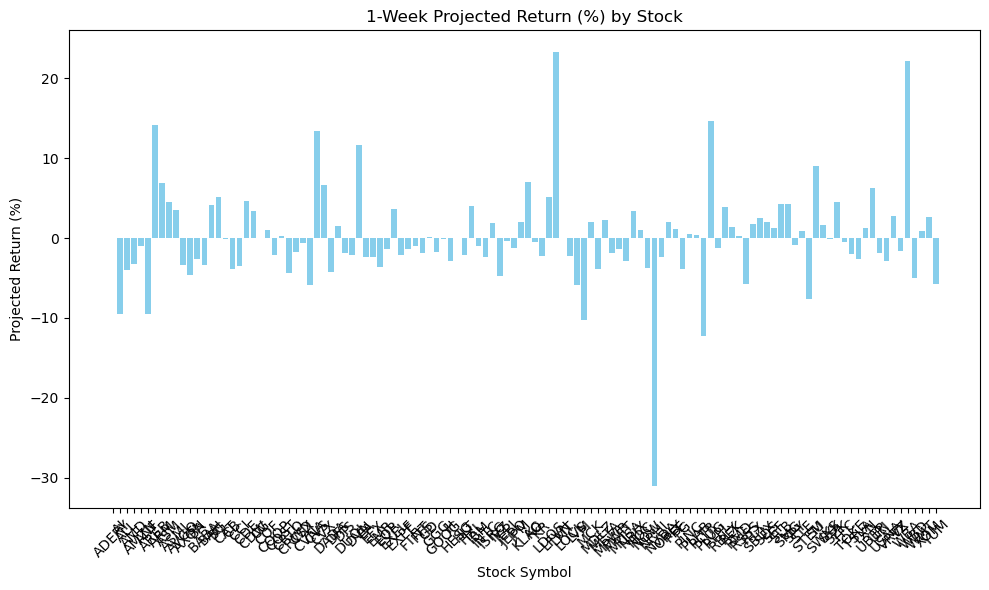

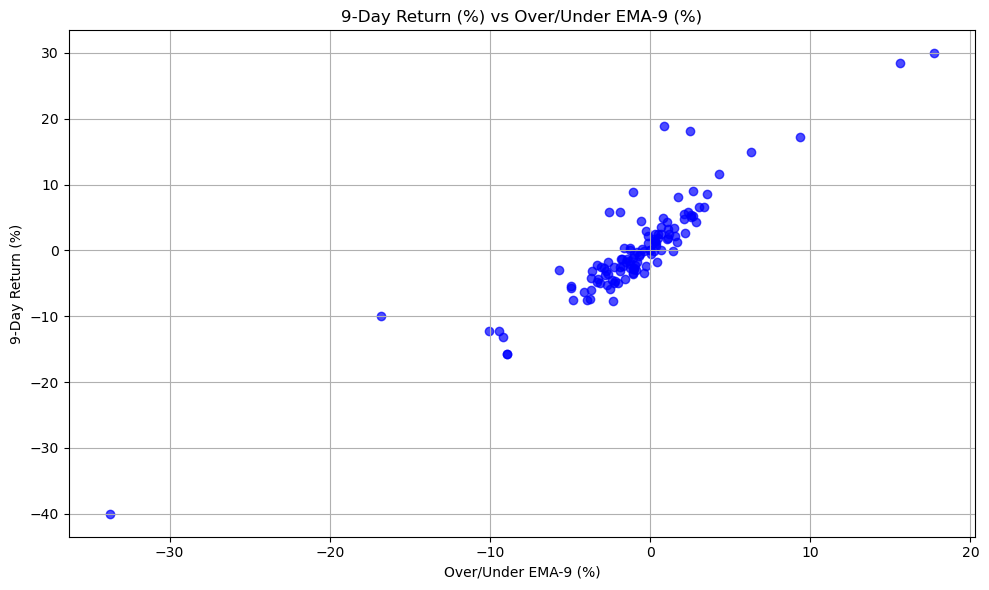

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def analyze_stocks(ticker_file):
    """
    Analyze stocks from a CSV file of tickers to calculate returns and EMA metrics
    
    Parameters:
    ticker_file (str): Path to CSV file containing stock tickers in 'symbol' column
    
    Returns:
    pandas.DataFrame: Analysis results for each stock
    """
    try:
        # Read tickers from CSV
        tickers_df = pd.read_csv(ticker_file)
        if 'symbol' not in tickers_df.columns:
            raise ValueError("CSV file must contain a 'symbol' column")
            
        tickers = tickers_df['symbol'].tolist()
        
        # Calculate date ranges
        end_date = datetime.now()
        start_date = end_date - timedelta(days=40)
        
        # Initialize results dictionary
        results = []
        
        for ticker in tickers:
            try:
                # Download stock data
                stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
                
                if len(stock) >= 20:  # Ensure we have enough data points
                    # Get the most recent values
                    current_price = stock['Adj Close'].iloc[-1]
                    nine_days_ago_price = stock['Adj Close'].iloc[-9]
                    twenty_days_ago_price = stock['Adj Close'].iloc[-20]
                    
                    # Calculate returns
                    nine_day_return = ((current_price / nine_days_ago_price) - 1) * 100
                    twenty_day_return = ((current_price / twenty_days_ago_price) - 1) * 100
                    
                    # Calculate 9-day EMA
                    ema_9 = stock['Adj Close'].ewm(span=9, adjust=False).mean()
                    current_ema = ema_9.iloc[-1]
                    
                    # Calculate current price difference from EMA
                    ema_difference = current_price - current_ema
                    ema_difference_pct = (ema_difference / current_ema) * 100
                    
                    # Determine sentiment
                    if ema_difference_pct < -10:
                        sentiment = "Extremely Bearish"
                    elif -10 <= ema_difference_pct < -5:
                        sentiment = "Moderately Bearish"
                    elif -5 <= ema_difference_pct < -1:
                        sentiment = "Lightly Bearish"
                    elif -1 <= ema_difference_pct <= 1:
                        sentiment = "Neutral"
                    elif 1 < ema_difference_pct <= 5:
                        sentiment = "Lightly Bullish"
                    elif 5 < ema_difference_pct <= 10:
                        sentiment = "Moderately Bullish"
                    else:
                        sentiment = "Extremely Bullish"
                    
                    # Calculate additional indicators
                    momentum_short = nine_day_return - twenty_day_return
                    one_week_projected_return = nine_day_return / 9 * 7
                    
                    results.append({
                        'Symbol': ticker,
                        'Current Price': round(current_price, 2),
                        '9-Day Return (%)': round(nine_day_return, 2),
                        '20-Day Return (%)': round(twenty_day_return, 2),
                        'EMA-9': round(current_ema, 2),
                        'Over/Under EMA-9': round(ema_difference, 2),
                        'Over/Under EMA-9 (%)': round(ema_difference_pct, 2),
                        'Sentiment': sentiment,
                        'Momentum (Short-Term)': round(momentum_short, 2),
                        '1-Week Projected Return (%)': round(one_week_projected_return, 2)
                    })
                else:
                    print(f"Warning: Insufficient data for {ticker}. Need at least 20 days of data.")
            
            except Exception as e:
                print(f"Error processing {ticker}: {str(e)}")
                
        if not results:
            raise ValueError("No valid stock data was processed")
                
        # Convert results to DataFrame
        results_df = pd.DataFrame(results)
        results_df = results_df.sort_values('Symbol')
        results_df.to_csv(r"X:\output\path\results.csv")
        
        return results_df
    
    except Exception as e:
        print(f"Error in analyze_stocks: {str(e)}")
        return None

def plot_charts(results_df):
    """
    Create visualizations for the analyzed stock data
    """
    # Bar chart for 1-week projected returns
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Symbol'], results_df['1-Week Projected Return (%)'], color='skyblue')
    plt.title('1-Week Projected Return (%) by Stock')
    plt.xlabel('Stock Symbol')
    plt.ylabel('Projected Return (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Scatter plot for EMA difference vs 9-day return
    plt.figure(figsize=(10, 6))
    plt.scatter(results_df['Over/Under EMA-9 (%)'], results_df['9-Day Return (%)'], c='blue', alpha=0.7)
    plt.title('9-Day Return (%) vs Over/Under EMA-9 (%)')
    plt.xlabel('Over/Under EMA-9 (%)')
    plt.ylabel('9-Day Return (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    ticker_file = r"X:\input\path\general.csv"
    results = analyze_stocks(ticker_file)
    if results is not None:
        print(results)
        plot_charts(results)

In [2]:
# Get Ticker Info

import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info
inf = msft.info

print(inf)

{'address1': 'One Microsoft Way', 'city': 'Redmond', 'state': 'WA', 'zip': '98052-6399', 'country': 'United States', 'phone': '425 882 8080', 'website': 'https://www.microsoft.com', 'industry': 'Software - Infrastructure', 'industryKey': 'software-infrastructure', 'industryDisp': 'Software - Infrastructure', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and pow

In [31]:
#Generate lastest price
import yfinance as yf
import pandas as pd

# Initialize an empty DataFrame to store the data
df = pd.DataFrame()

# Load the list of symbols from the CSV file
source = pd.read_csv(r"X:\input\path\holdings.csv")
symbols = source["symbol"].tolist()

# Loop through each symbol and get the latest price
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    latest_price = ticker.history(period="1d")["Close"].iloc[-1]
    df = df._append({"Symbol": symbol, "Latest Price": latest_price}, ignore_index=True)

# Print the resulting DataFrame
print(df)


  Symbol  Latest Price
0   CALM    109.970001
1    FCX     39.500000
2   MSFT    415.670013
3    NEE     67.980003
4    RIO     60.380001
5    SES      0.820300
6    SDS     19.980000
7    SPY    582.190002
8   CEIN      0.035000
9   VHAI      0.005400
